<a id = "top"></a>
# Unsupervised Learning
#### k-Means and Mixture Models
----

_Author: Eduard Valera Zorita_

### Assignment Contents
- [Introduction](#introduction)
- [1. Dataset preprocessing](#dataset)
- [2. Feature Selection](#features)
- [3. Unsupervised clustering with k-Means](#kmeans)
- [4. Probabilistic models: Gaussian Mixtures](#mixturemodels)
- [5. Considerations on feature dimensionality](#featdims)

#### EXPECTED TIME: 2 HRS

### Question reference
- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)
- [Question 14](#q14)
- [Question 15](#q15)

---
[Back to top](#top)
<a id = "introduction"></a>

## Introduction

### Overview
This assignment refers specifically to Unsupervised Learning. The objective of this exercise will be to classify a data set excluding the class information and using only the available features. The class information will be available to us, but it will only be used in the models to characterize their performances. Concretely, we will focus our attention on two algorithms:

- k-Means clustering
- Mixture models (Gaussian Mixtures)

During the assignment you will compare the performance of both algorithms and will be required to answer questions about them. We will also emphasize the importance of feature selection, as this will serve as an introduction to the topic of Dimensionality Reduction.

### Data set
The exercises of this assignment will guide you through the unsupervised classification of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). The data set contains 4 features and 3 classes of 50 samples each (150 samples in total), where each class refers to a type of iris plant. The features are width and length measurements performed on the sepals and petals of each plant sample.

The features and class names are described below:
1. __sepal_len__: sepal length in cm
2. __sepal_width__: sepal width in cm
3. __petal_length__: petal length in cm
4. __petal_width__: petal width in cm
5. __class__: Iris plant type (Iris Setosa, Iris Versicolour, Iris Virginica)


---
[Back to top](#top)
<a id = "dataset"></a>

<a id="dataset"></a>
## 1. Dataset preprocessing

### Imports

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data
Before we begin, we need to load the dataset file into memory. The dataset location has been assigned to the `DATA_PATH` variable.

---
[Back to top](#top)
<a id = "q1"></a>

### Question 1
Use the function [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to load the data set. The path to the file is `DATA_PATH`. Set the appropriate parameter to use the first row as the column names. Assign the resulting `DataFrame` to the variable `data`.

In [6]:
### GRADED
###
### Use the function pd.read_csv() to load the data set. 
### The path to the file is `DATA_PATH`.
### Set the appropriate parameter to use the first row as the column names.
### Assign the resulting DataFrame to the variable 'data'.

DATA_PATH = 'data/iris_dataset.csv'

### YOUR ANSWER BELOW
data = pd.read_csv(DATA_PATH)

###
### YOUR CODE HERE
###


In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


A quick visualization of the dataset:

In [5]:
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---
[Back to top](#top)
<a id = "q2"></a>

### Question 2
Separate the features and the labels from `data`. Remember: the column name of the labels is `class`. Create a `DataFrame` with the features and name it `X` and a `Series` with the labels and name it `labels`.

In [8]:
### GRADED
###
### Separate the features and the labels from data. The labels are the column 'class'.
### Assign a pd.DataFrame with the features to 'X'.
### Assign a pd.Series with the labels to 'labels'.

### YOUR ANSWER BELOW
X = data.filter(['sepal_len','sepal_width','petal_len','petal_width'])
X_new = data[['sepal_len','sepal_width','petal_len','petal_width']]
labels = pd.Series(data['class'])

###
### YOUR CODE HERE
###


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Clustering algorithms group samples by feature similarity. These groups of similar samples are named __clusters__. When the algorithm predicts the group of a sample, it does so by assigning a cluster number. For instance, if we cluster a data set into three clusters, the predicted group assigned to each sample will be either `0`, `1` or `2`.

To verify the correctness of the clustering, we need to compare the cluster assignments made by the algorithm with the actual labels. In general, it is desirable that each cluster contains samples from only one class and that all samples of the same class are concentrated in a single cluster.

To ease the comparison between labels and clusters, we will convert the class labels from strings to integers:

In [10]:
np.unique(labels)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

---
[Back to top](#top)
<a id = "q3"></a>

### Question 3
Convert the classes in `labels`: `Iris-setosa`, `Iris-versicolor` and `Iris-virginica` to `0`, `1` and `2`, respectively. Do not alter the order of the samples. Assign a `np.array` with the same number of elements as `labels` to `y`.

In [11]:
### GRADED
###
### Convert the classes in 'labels' to integers as follows:
### 'Iris-setosa' -> 0
### 'Iris-versicolor' -> 1
### 'Iris-virginica' -> 2
### Assign a `np.array` with the same number of elements as `labels` to `y`.
###
### NOTE: Do not alter the order of the samples.

### YOUR ANSWER BELOW
y = np.where(labels == 'Iris-setosa',0,np.where(labels == 'Iris-versicolor',1,2)).reshape((labels.size,))

###
### YOUR CODE HERE
###


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


---
[Back to top](#top)
<a id = "features"></a>

## 2. Feature selection

Before fitting the models, let's take a look at the features:
> __Note:__ Questions 2 and 3 must be correct to properly visualize this plot.

<IPython.core.display.Javascript object>


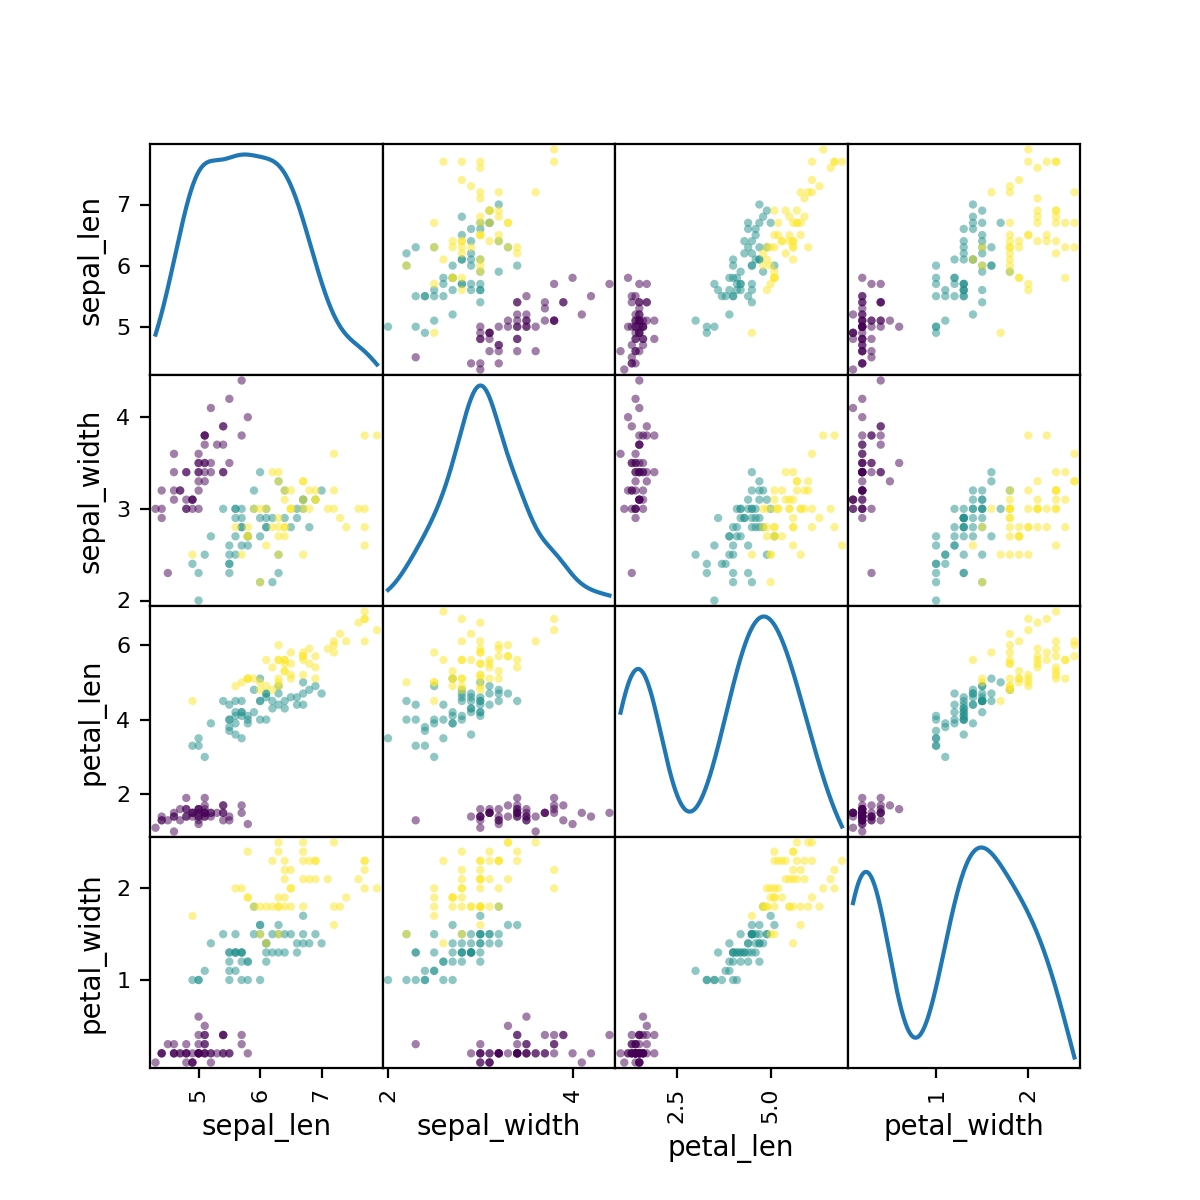

In [15]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(X, figsize = (6, 6), diagonal = 'kde', c=y)

Note how the distributions of `petal_len` and `petal_width`, at the diagonal plots, clearly resemble a bimodal Gaussian (the combination of two Gaussians). The distribution of the samples on the `petal_len` vs `petal_width` scatter plot shows litte overlap between classes. Also, the combination of `petal_width` and `sepal_len` seems to provide a good separation of the classes.

These feature pairs may be a good starting point to train our unsupervised models. To start, we will fit our models using only two features, as this will facilitate the visualization of the resulting clusters/distributions.

---
[Back to top](#top)
<a id = "q4"></a>

### Question 4
Create two new feature DataFrames `X_petal` and `X_mixed`:
- `X_petal` must be a DataFrame with the following columns of `X`: `petal_len` and `petal_width` (in this order).
- `X_mixed` must be a DataFrame with the following columns of `X`: `petal_width` and `sepal_len` (in this order).

In [16]:
### GRADED
###
### Create two new feature DataFrames `X_petal` and `X_mixed`:
### `X_petal` must be a DataFrame with features: `petal_len` and `petal_width` (in this order).
### `X_mixed` must be a DataFrame with features: `petal_width` and `sepal_len` (in this order).
###

### YOUR ANSWER BELOW
X_petal = X.filter(['petal_len','petal_width'])
X_mixed = X.filter(['petal_width','sepal_len'])

###
### YOUR CODE HERE
###


In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


---
[Back to top](#top)
<a id = "kmeans"></a>

## 3. Unsupervised clustering with k-Means

In [18]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.cluster import KMeans

### Voronoi diagram function
The following function will be used to visualize the cluster regions generated by the k-Means algorithm. Visit the [wikipedia page of Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) for more information.

Run the cell below to define the function `voronoi_diagram()`, the details of the function implementation are irrelevant at this moment:

In [19]:
from scipy.spatial import Voronoi

def voronoi_diagram(means, X, y, radius=None):
    """
    Adapted from: https://nbviewer.jupyter.org/gist/pv/8037100
    """
    # Correct bug for N=3
    if means.shape[0] == 3:
        means = np.concatenate((means,np.array([[-1000,-1000]])),0)
    vor = Voronoi(means)
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    regions = new_regions
    vertices = np.asarray(new_vertices)

    # colorize
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), alpha=0.4)

    plt.plot(vor.points[:,0], vor.points[:,1], 'ko')
    plt.axis('equal')
    plt.xlim(np.min(X[:,0])-.1, np.max(X[:,0])+.1)
    plt.ylim(np.min(X[:,1])-.1, np.max(X[:,1])+.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

### k-Means on petal features
In this section we will use k-means to cluster the petal features. Clustering the samples on the selected feature pair should be quite easy since the sizes of the clusters are similar and the different classes show little overlap:

<IPython.core.display.Javascript object>


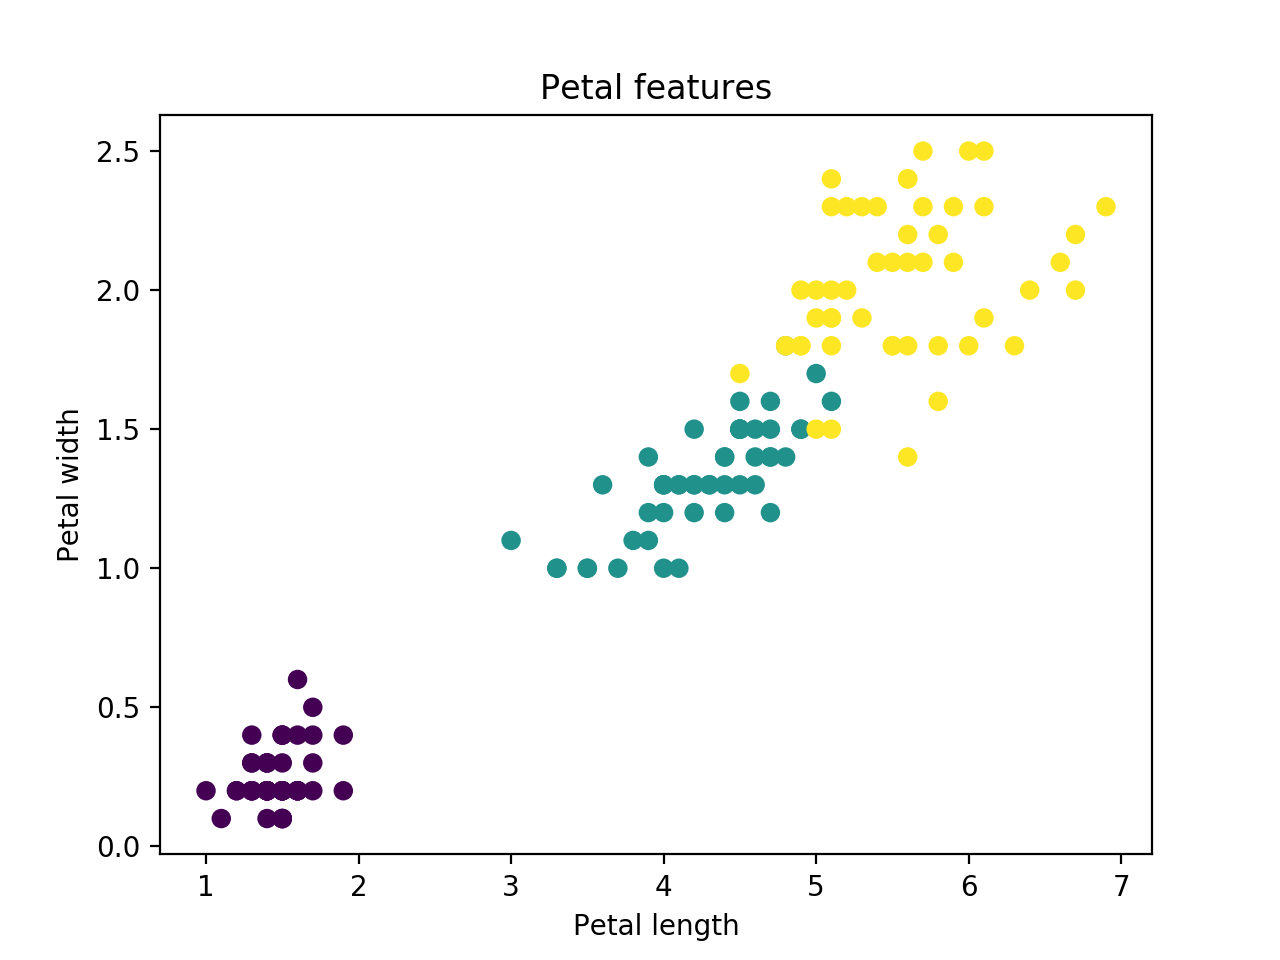

In [20]:
plt.figure()
plt.scatter(X_petal['petal_len'], X_petal['petal_width'], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal features')
plt.show()

---
[Back to top](#top)
<a id = "q5"></a>

### Question 5
Use [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster `X_petal`. Set `n_clusters` to 3 and `random_state=42`. Assign the fitted model to `petal_model`. Compute the [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) of the model, assign to `petal_score`. Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and assign it to `petal_matrix`.

In [22]:
### GRADED
###
### Fit X_petal using k-Means with 3 clusters and random_state=42.
### Assign the fitted model to 'petal_model'.
### Compute the adjusted random score of the model and assign it to 'petal_score'.
### Compute the confusion matrix and assign it to 'petal_matrix'.
###
### NOTE: Use y as the label vector to compute adjusted_rand_score and confusion_matrix.

### YOUR ANSWER BELOW
petal_model = KMeans(n_clusters=3,random_state=42).fit(X_petal)
petal_score = adjusted_rand_score(y,petal_model.predict(X_petal))
petal_matrix = confusion_matrix(y,petal_model.predict(X_petal))


###
### YOUR CODE HERE
###
### Check answer:
print("k-Means score with petal features: {}".format(petal_score))
print("Confusion matrix:\n{}".format(petal_matrix))

k-Means score with petal features: 0.8856970310281228
Confusion matrix:
[[ 0 50  0]
 [ 2  0 48]
 [46  0  4]]


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Check the cluster regions. Note that the boundary between the middle and right clusters matches very well the edge between classes:
> __Note:__ Question 5 must be correct to properly visualize this plot.

<IPython.core.display.Javascript object>


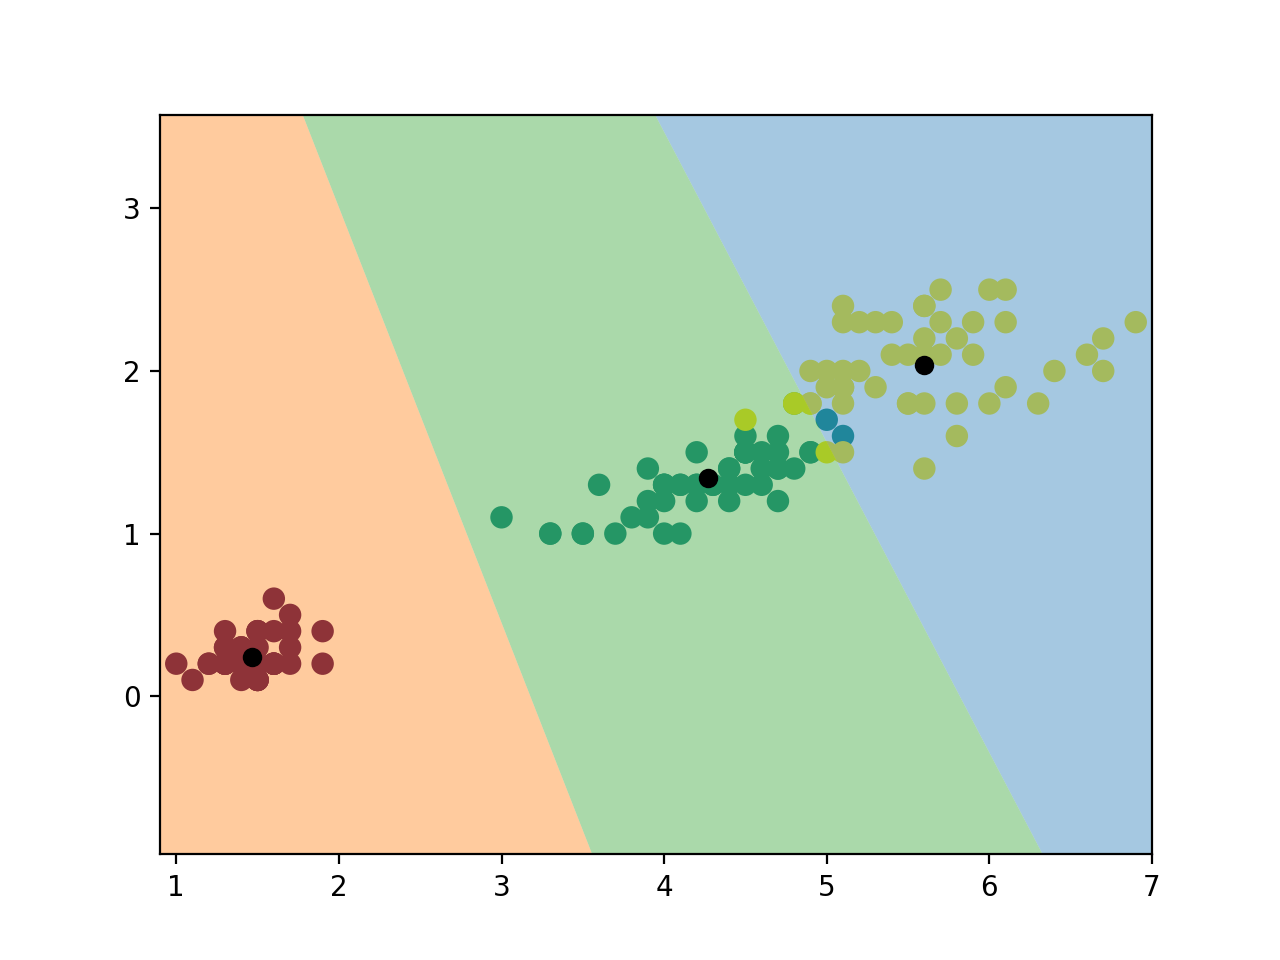

In [24]:
plt.figure()
voronoi_diagram(petal_model.cluster_centers_, X_petal.values, y)

---
[Back to top](#top)
<a id = "q6"></a>

### Question 6
Examine the cluster regions above and answer the following question:

In [27]:
### GRADED
###
### Considering the properties of k-Means, which of the following are True?
###
### a) The score would increase if the middle and right classes had different spatial extent but the same mean.
### b) The score would increase if the middle and right classes had smaller variance and the same mean.
### c) The score would be the same if we move the left cluster towards the left.
### d) X_petal can be perfectly clustered with k-means.
### e) At least one class is perfectly clustered.
### f) Neither class is perfectly clustered.
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','f']

### YOUR ANSWER BELOW

ans1 = ['b','c','e']

###
### YOUR CODE HERE
###


In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### k-Means on mixed features
Now we are going to repeat the same process using the mixed features set:

<IPython.core.display.Javascript object>


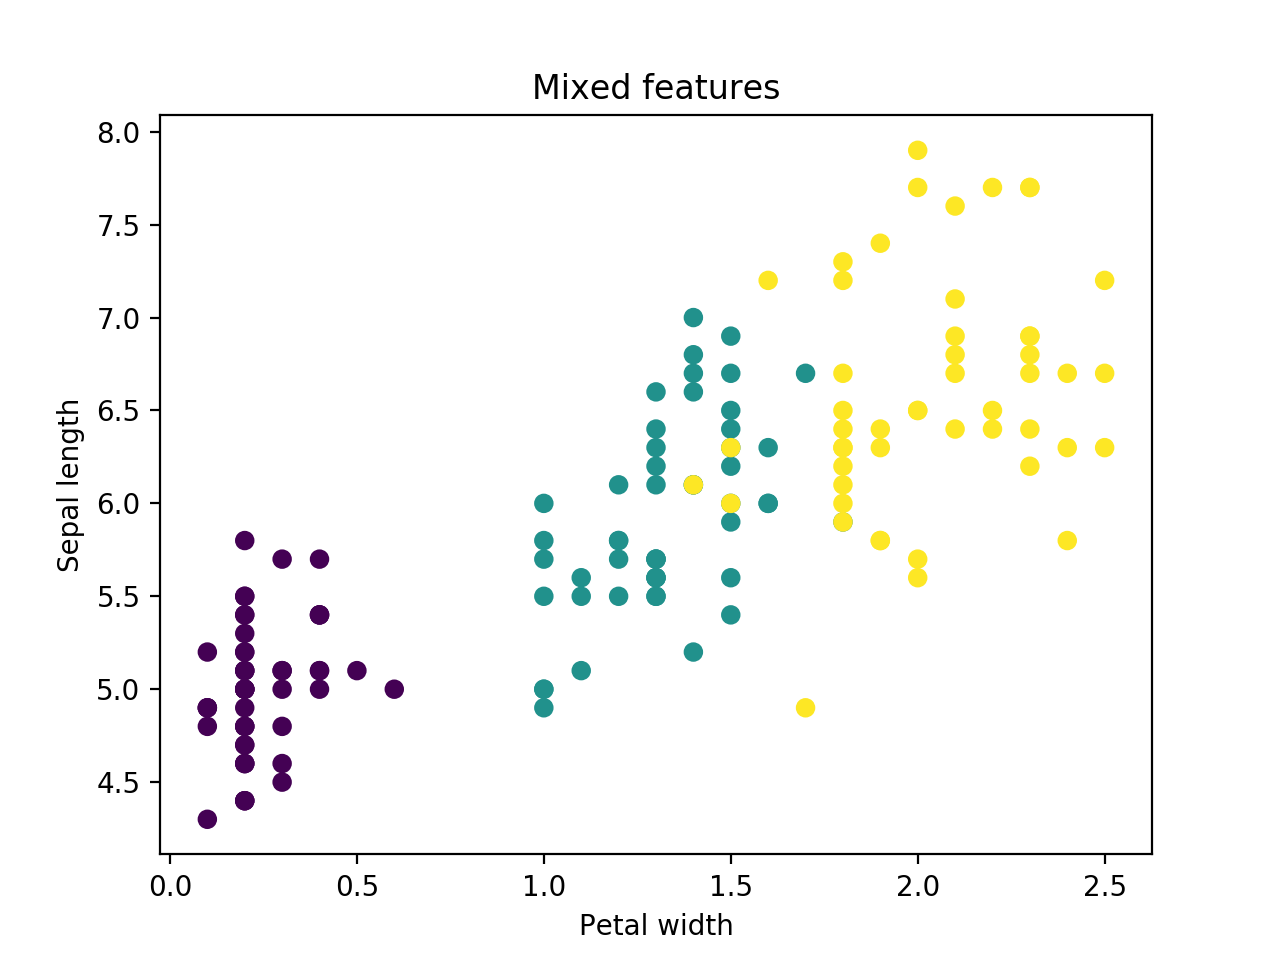

In [29]:
plt.figure()
plt.scatter(X_mixed['petal_width'], X_mixed['sepal_len'], c=y)
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Mixed features')
plt.show()

---
[Back to top](#top)
<a id = "q7"></a>

### Question 7
Use [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster `X_mixed`. Set `k` to 3 clusters and `random_state=42`. Assign the fitted model to `mixed_model`. Assign the [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) of the model to `mixed_score`. Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and assign it to `mixed_matrix`.

In [31]:
### GRADED
###
### Fit X_mixed using k-Means with 3 clusters and random_state=42.
### Assign the fitted model to 'mixed_model'.
### Compute the adjusted random score of the model and assign it to 'mixed_score'.
### Compute the confusion matrix and assign it to mixed_matrix.
###


### YOUR ANSWER BELOW
mixed_model = KMeans(n_clusters=3,random_state=42).fit(X_mixed)
mixed_score = adjusted_rand_score(y,mixed_model.predict(X_mixed))
mixed_matrix = confusion_matrix(y,mixed_model.predict(X_mixed))


###
### YOUR CODE HERE
###
### Check answer:
print("k-Means score with mixed features: {}".format(mixed_score))
print("Confusion matrix:\n{}".format(mixed_matrix))

k-Means score with mixed features: 0.5726832765728626
Confusion matrix:
[[ 0 50  0]
 [ 9  4 37]
 [35  0 15]]


In [32]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The cluster regions generated from `X_mixed`:
> __Note:__ Question 7 must be correct to properly visualize this plot.

<IPython.core.display.Javascript object>


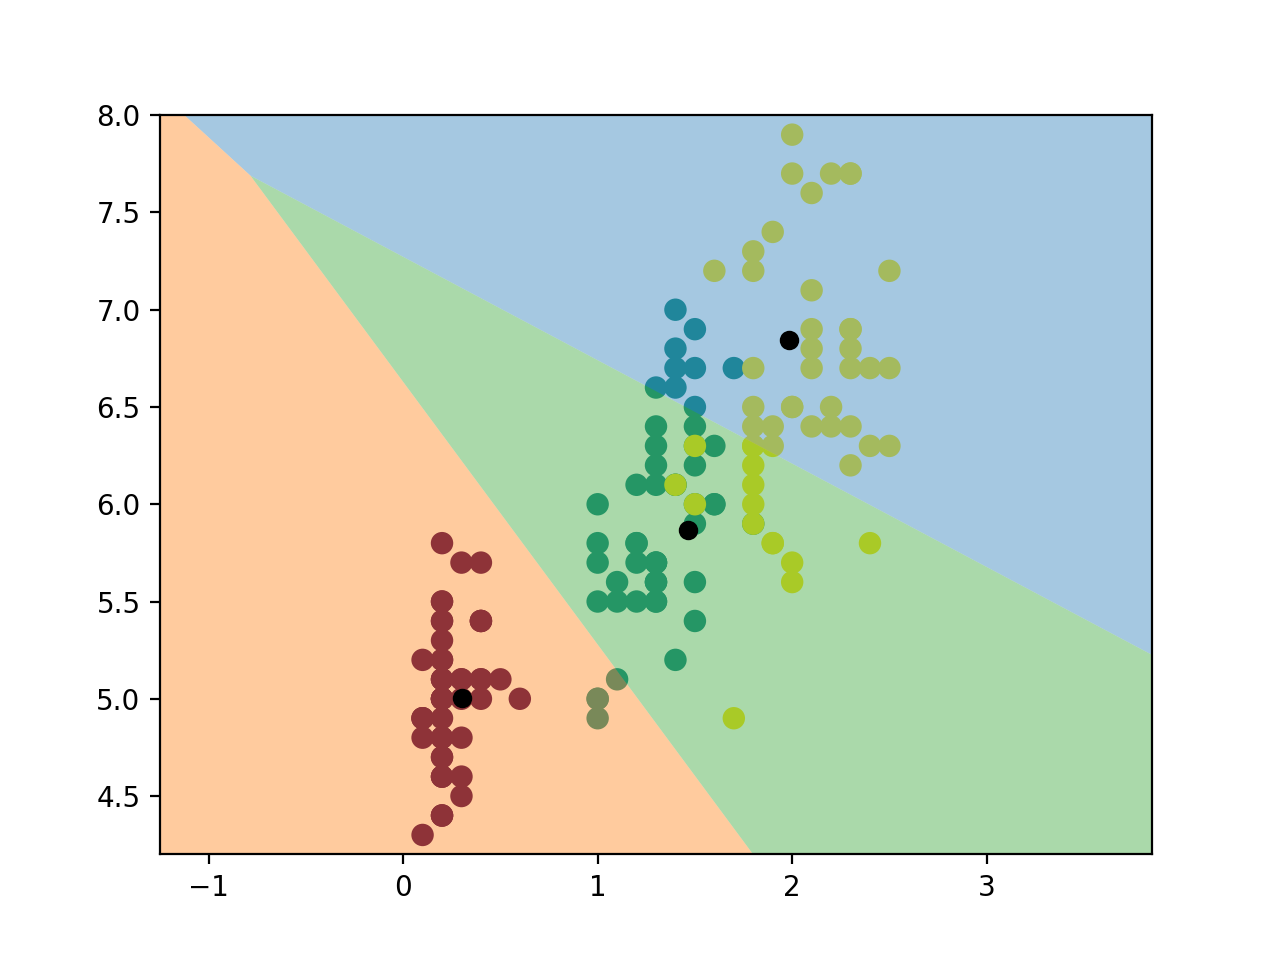

In [33]:
plt.figure()
voronoi_diagram(mixed_model.cluster_centers_, X_mixed.values, y)

---
[Back to top](#top)
<a id = "q8"></a>

### Question 8
Examine the cluster regions above and answer the following question:

In [35]:
### GRADED
###
### Compare the clusterings on X_petal and X_mixed, which of the following are True?
###
### a) The poor performance with X_mixed is mostly due to the misalignment between cluster borders and class borders.
### b) k-Means performs poorly on X_mixed because the true covariance of the classes is not spherical.
### c) All clusters in X_mixed contain classification errors.
### d) X_mixed cannot be perfectly clustered using k-Means.
###
### NOTE: Spherical covariance: the distribution has the same variance in all dimensions and
###       all dimensions are uncorrelated. This would visualize as a circular cloud of points in a 2D space.
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','f']

### YOUR ANSWER BELOW

ans1 = ['a','b','c','d']

###
### YOUR CODE HERE
###


In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### k-Means with all features
Finally, we will use all the available features to perform unsupervised clustering on the Iris data set:

---
[Back to top](#top)
<a id = "q9"></a>

### Question 9
Use [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster `X`. Set `k` to 3 clusters and `random_state=42`. Assign the fitted model to `full_model`. Assign the [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) of the model to `full_score`. Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and assign it to `full_matrix`.

In [37]:
### GRADED
###
### Fit 'X' using k-Means with 3 clusters and random_state=42.
### Assign the fitted model to 'full_model'.
### Compute the adjusted random score of the model and assign it to 'full_score'.
###

### YOUR ANSWER BELOW
full_model = KMeans(n_clusters=3,random_state=42).fit(X)
full_score = adjusted_rand_score(y,full_model.predict(X))
full_matrix = confusion_matrix(y,full_model.predict(X))


###
### YOUR CODE HERE
###
### Check answer:
print("k-Means score with all features: {}".format(full_score))
print("Confusion matrix:\n{}".format(full_matrix))

k-Means score with all features: 0.7302382722834697
Confusion matrix:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [38]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The final results using all the features cannot be easily visualized, since we used more than 3 features. However, note how the classification performance has decreased with respect to clustering with just two features (`X_petal`). We will expand on this phenomenon in the last section of the assignment.

---
[Back to top](#top)
<a id = "mixturemodels"></a>

## 4. Probabilistic models: Gaussian Mixtures
In this section we will repeat the same classifications made with k-Means. Thanks to the visualization functions, we will be able to assess why sometimes Gaussian mixtures are mode adequate than k-Means clustering.

In [39]:
from sklearn.mixture import GaussianMixture

The function below implements the 2D visualization of the mixtures. Basically, it represents the samples in a 2D space overlapped with the ovals that represent the covariance of the allocated Gaussian distributions. Run the cell below to define the function. Again, the implementation details are not important.

In [40]:
import matplotlib as mpl
from scipy.stats import norm as gd
import scipy.linalg as linalg
import itertools

color_list = ['navy', 'cornflowerblue', 'gold']
color_iter = itertools.cycle(color_list)

def plot_gaussian_mixtures(X, Y_, means, covariances, subplot=None):
    '''
    Adapted from https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
    '''
    if subplot is None:
        splot = plt.subplot(1, 1, 1)
    else:
        splot = subplot

    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

### Gaussian Mixtures on petal features
This part is analogous to the clustering of the petal features with k-Means.

<IPython.core.display.Javascript object>


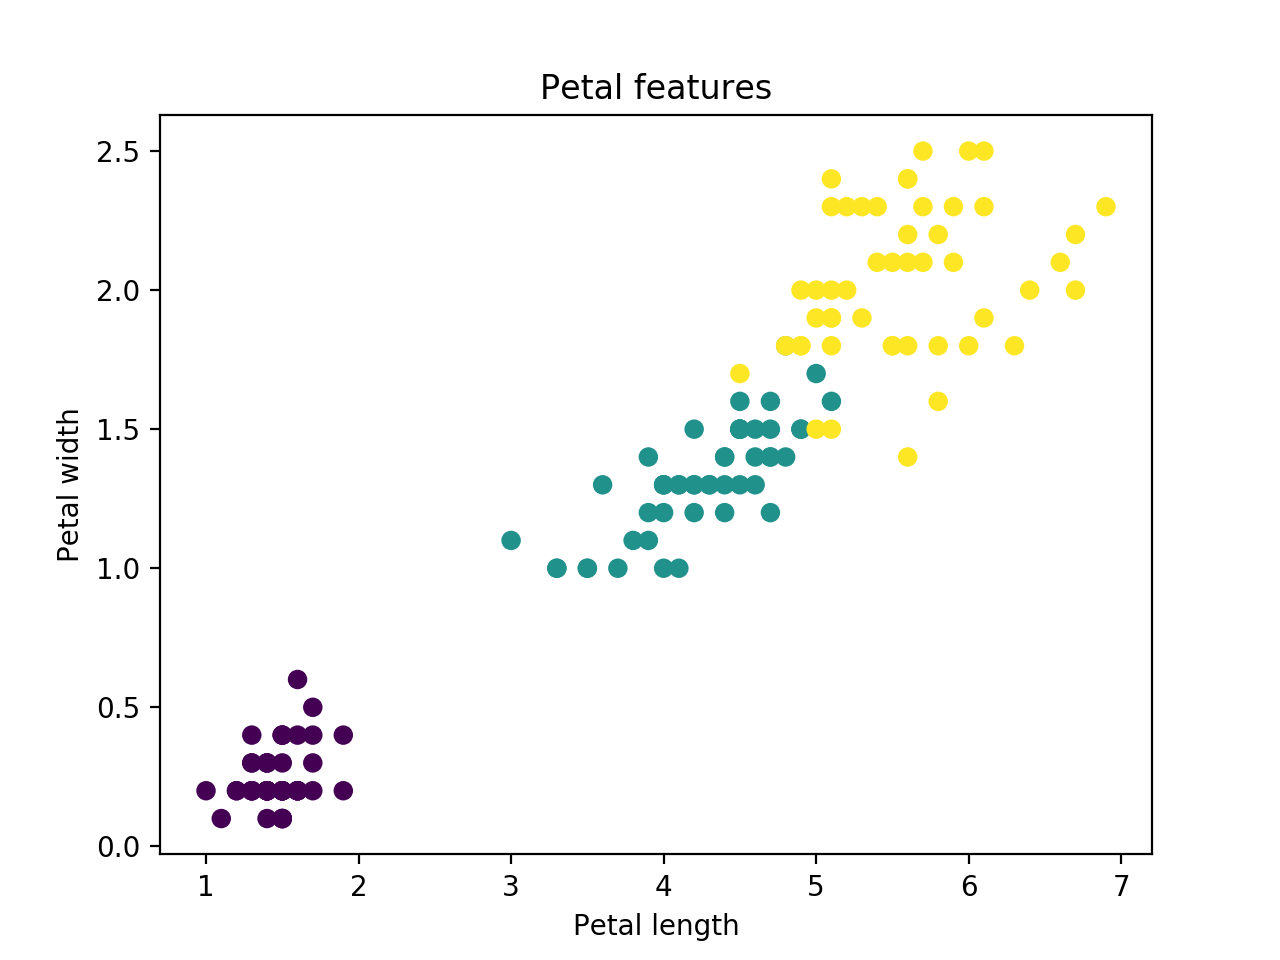

In [41]:
plt.figure()
plt.scatter(X_petal['petal_len'], X_petal['petal_width'], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal features')
plt.show()

---
[Back to top](#top)
<a id = "q10"></a>

### Question 10
Use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster `X_petal`. Set `n_components` to 3, `full covariance` and `random_state=42`. Assign the fitted model to `petal_mixture_model`. Assign the [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) of the model to `petal_mixture_score`. Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and assign it to `petal_mixture_matrix`.

In [43]:
### GRADED
###
### Fit X_petal using GaussianMixture with 3 components, full covariance and random_state=42.
### Assign the fitted model to 'petal_mixture_model'.
### Compute the adjusted random score of the model and assign it to 'petal_mixture_score'.
### Compute the confusion matrix and assign it to 'petal_mixture_matrix'.
###

### YOUR ANSWER BELOW
petal_mixture_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(X_petal)
petal_mixture_score = adjusted_rand_score(y,petal_mixture_model.predict(X_petal))
petal_mixture_matrix = confusion_matrix(y,petal_mixture_model.predict(X_petal))


###
### YOUR CODE HERE
###
### Check answer:
print("Mixture model score with petal features: {}".format(petal_mixture_score))
print("Confusion matrix:\n{}".format(petal_mixture_matrix))

Mixture model score with petal features: 0.9221767019765943
Confusion matrix:
[[ 0 50  0]
 [ 1  0 49]
 [47  0  3]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The mixture of distributions for `X_petal`:
> __Note:__ Question 10 must be correct to properly visualize this plot.

<IPython.core.display.Javascript object>


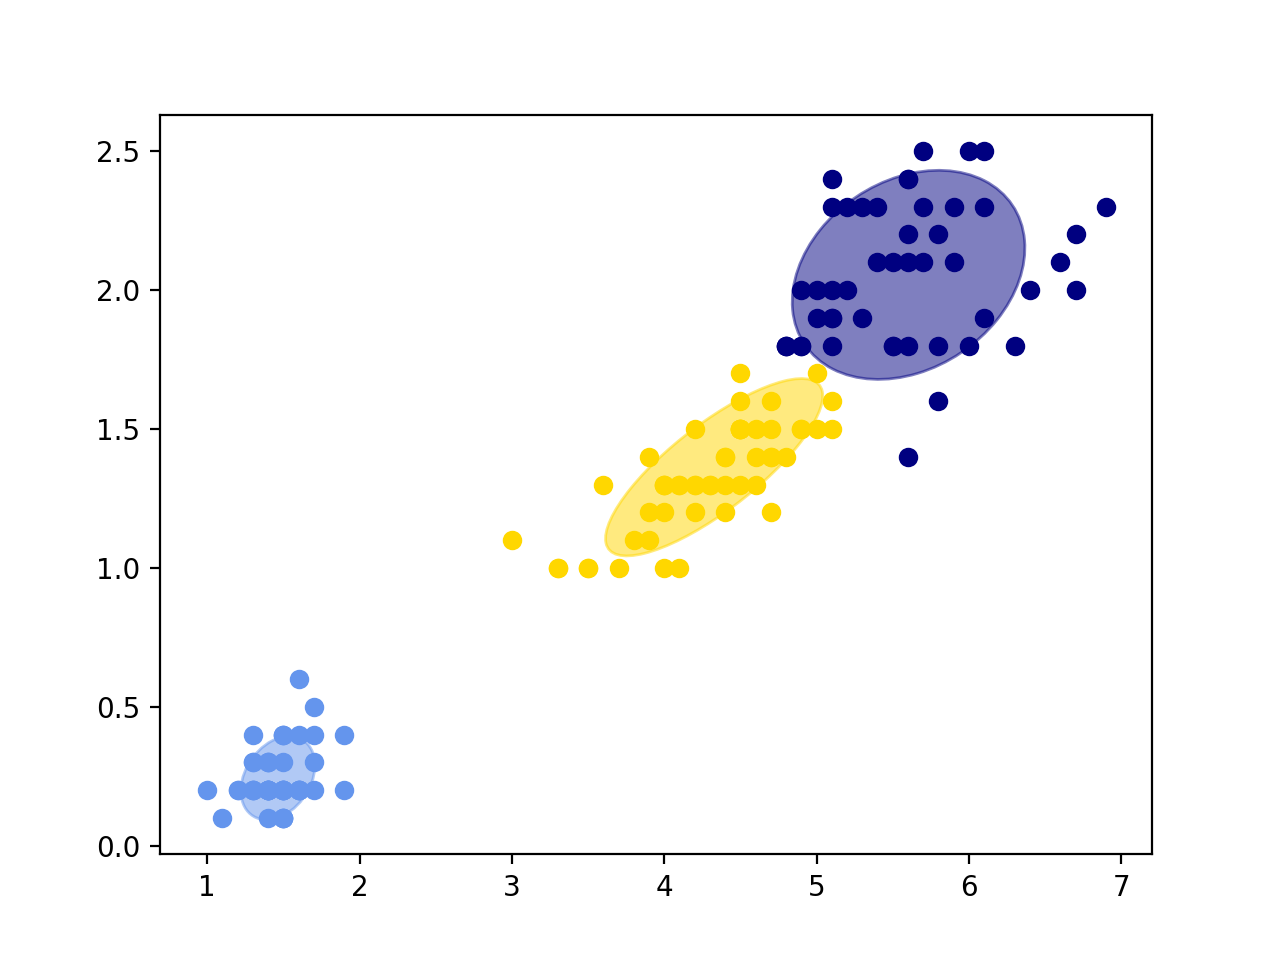

In [44]:
plt.figure()
plot_gaussian_mixtures(X_petal.values, 
                       petal_mixture_model.predict(X_petal),
                       petal_mixture_model.means_,
                       petal_mixture_model.covariances_)

---
[Back to top](#top)
<a id = "q11"></a>

### Question 11
What is the probability that a plant with `petal_length=5.0` and `petal_width=1.75` belongs to the species Iris Virginica?
> Notes:
> - Use the `petal_mixture_model` to predict the probabilities.
> - GaussianMixtures have a [.predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.predict_proba) method.
> - Iris Virginica has class number `2`, find the correspondence with the cluster number using the confusion matrix.

Assign the answer to `ans1`.

In [47]:
### GRADED
###
### What is the probability that a plant with petal_length=5.0 and petal_width=1.75
### belongs to the species Iris Virginica?
### Use the petal_mixture_model to predict the probabilities.
### Use the method .predict_proba().
###
### NOTE: The result of predict proba gives the probability that the sample belongs to
###       clusters 0, 1 and 2 (in this order). You need to find the correspondence
###       between the cluster and the class numbers. Our suggestion is to use the confusion
###       matrix to do so. The class number assigned to Iris-virginica is 2.
###
### Assign the probability to ans1.
###

### YOUR ANSWER BELOW
ans1 = petal_mixture_model.predict_proba([[5.0,1.75]])[0,0]

###
### YOUR CODE HERE
###
### Answer check
print('Probability of a plant with petal length 5.0cm and petal width 1.75cm to be Iris Virginica: {}'.format(ans1))

Probability of a plant with petal length 5.0cm and petal width 1.75cm to be Iris Virginica: 0.39038113370878075


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Gaussian Mixtures on mixed features

Let's visualize again a scatter plot of the mixed features before fitting:

<IPython.core.display.Javascript object>


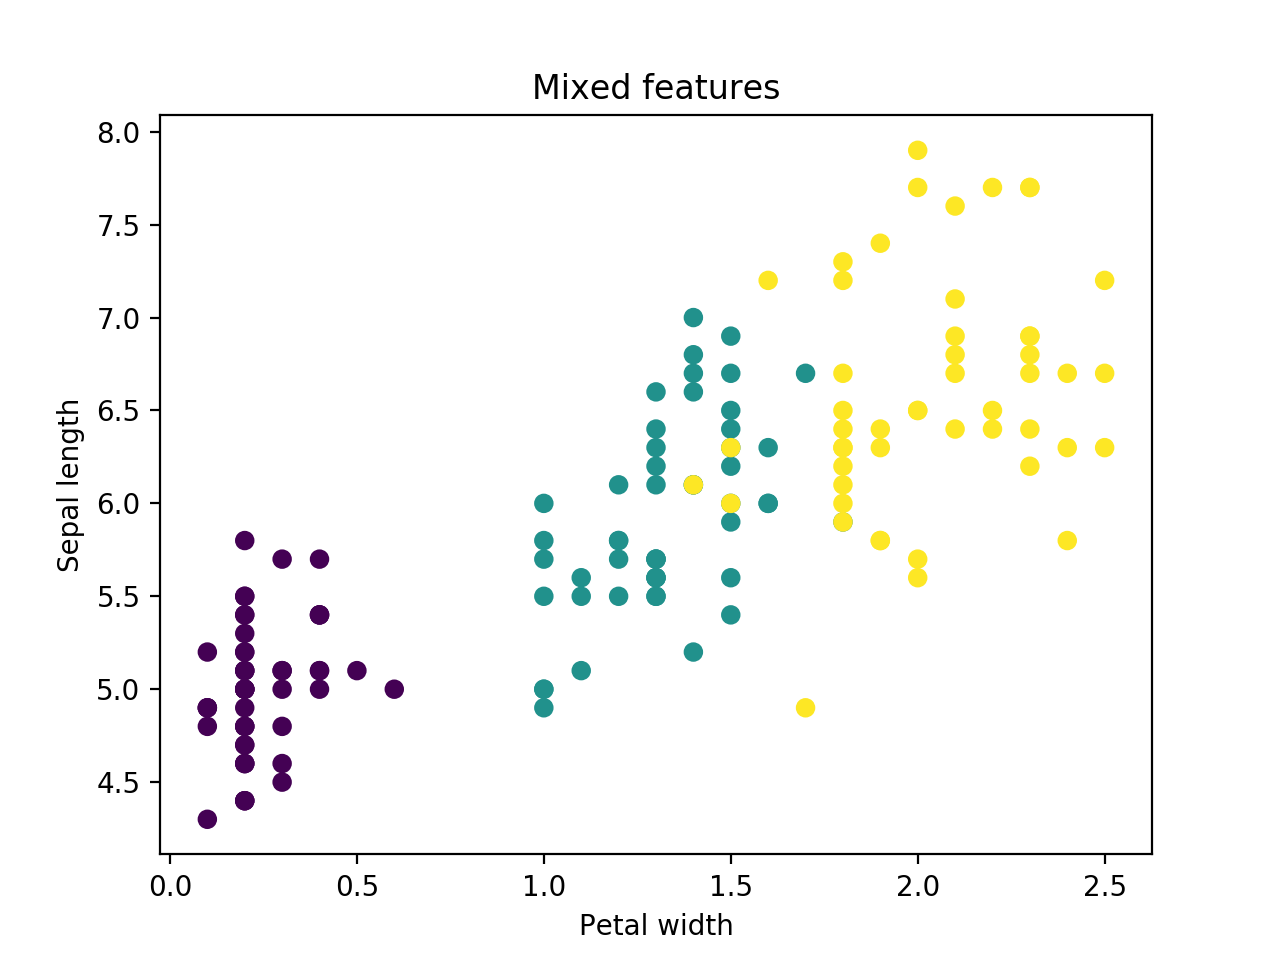

In [49]:
plt.figure()
plt.scatter(X_mixed['petal_width'], X_mixed['sepal_len'], c=y)
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Mixed features')
plt.show()

---
[Back to top](#top)
<a id = "q12"></a>

### Question 12
Use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster `X_mixed`. Set `n_components` to 3, `covariance_type='full'` and `random_state=42`. Assign the fitted model to `mixed_mixture_model`. Assign the [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) of the model to `mixed_mixture_score`. Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and assign it to `mixed_mixture_matrix`.

In [50]:
### GRADED
###
### Fit X_mixed using GaussianMixture with 3 components, full covariance and random_state=42.
### Assign the fitted model to 'mixed_mixture_model'.
### Compute the adjusted random score of the model and assign it to 'mixed_mixture_score'.
### Compute the confusion matrix and assign it to 'mixed_mixture_matrix'.
###

### YOUR ANSWER BELOW
mixed_mixture_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(X_mixed)
mixed_mixture_score = adjusted_rand_score(y,mixed_mixture_model.predict(X_mixed))
mixed_mixture_matrix = confusion_matrix(y,mixed_mixture_model.predict(X_mixed))



###
### YOUR CODE HERE
###
### Check answer:
print("Mixture model score with mixed features: {}".format(mixed_mixture_score))
print("Confusion matrix:\n{}".format(mixed_mixture_matrix))

Mixture model score with mixed features: 0.8831353486582851
Confusion matrix:
[[ 0  1 49]
 [ 1 49  0]
 [46  4  0]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The mixture of distributions for `X_mixed`:
> __Note:__ Question 12 must be correct to properly visualize this plot.

In [ ]:
plt.figure()
plot_gaussian_mixtures(X_mixed.values, 
                       mixed_mixture_model.predict(X_mixed),
                       mixed_mixture_model.means_,
                       mixed_mixture_model.covariances_)

---
[Back to top](#top)
<a id = "q13"></a>

### Question 13
Examine the mixture distributions above (Questions 10 and 12) and answer the following question:

In [51]:
### GRADED
###
### Compare the clusterings made wih k-Means and Gaussian Mixtures, which of the following are True?
###
### a) Mixture models consistently outperform k-Means on this dataset.
### b) Fitting X_mixed with covariance_type='spherical' would have provided better performance.
### c) Mixture models perform better in this dataset because they can adapt their covariances to mimic the feature distributions.
### d) k-Means has more model parameters than Gaussian Mixtures.
### e) The fitting of Gaussian Mixtures to X_mixed is sensitive to the choice of 'covariance_type'.
### f) The covariances of the Gaussian components in X_mixed are all different.
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','e']

### YOUR ANSWER BELOW

ans1 = ['a','c','e','f']

###
### YOUR CODE HERE
###


In [52]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Gaussian Mixture on all features
Finally, we will classify the dataset with Gaussian Mixtures using all the features.

---
[Back to top](#top)
<a id = "q14"></a>

### Question 14
Use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster `X`. Set `n_components` to 3, `covariance_type='full'` and `random_state=42`. Assign the fitted model to `full_mixture_model`. Assign the [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) of the model to `full_mixture_score`. Compute the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and assign it to `full_mixture_matrix`.

In [53]:
### GRADED
###
### Fit 'X' using GaussianMixture with 3 components, full covariance and random_state=42.
### Assign the fitted model to 'full_mixture_model'.
### Compute the adjusted random score of the model and assign it to 'full_mixture_score'.
### Compute the confusion matrix and assign it to 'full_mixture_matrix'.
###

### YOUR ANSWER BELOW
full_mixture_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(X)
full_mixture_score = adjusted_rand_score(y,full_mixture_model.predict(X))
full_mixture_matrix = confusion_matrix(y,full_mixture_model.predict(X))


###
### YOUR CODE HERE
###
### Check answer:
print("Mixture model score with all features: {}".format(full_mixture_score))
print("Confusion matrix:\n{}".format(full_mixture_matrix))

Mixture model score with all features: 0.9038742317748124
Confusion matrix:
[[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


---
[Back to top](#top)
<a id = "featdims"></a>

## 5. Considerations on feature dimensionality

It is very clear that the selection of features highly influences the performance of unsupervised algorithms. Pairs of features where the classes are clearly separated will provide better performance. If there is no overlap in the blob of points, these algorithms can even achieve perfect clusterings.

However, when we employed all the features we got worse classifications compared to just using two carefully selected features. This may seem counterintuitive. How is it possible that adding more information to the model reduces its performance?

There is not a single explanation for this phenomenon, but these are common causes:
- A new feature may unbalance the spatial extent of the samples _(detrimental for k-Means)_.
- A new feature may break the similarity of the distribution to an easy combination of Gaussians _(detrimental for Gaussian Mixtures)_.
- Adding more features results in a greater hyperspace of parameters, hence increasing the probability that the algorithm converges to a local minimum _(detrimental for both)_.
- Adding more features results in greater number of parameters to be optimized, thus increasing the computational complexity and the probability that the algorithm exhausts its iteration limit _(detrimental for both)_.

---
[Back to top](#top)
<a id = "q15"></a>

### Question 15
The following question summarizes the content of the Unsupervised Learning lecture.

In [ ]:
### GRADED
###
### With your current knowledge of Unsupervised Learning, k-Means and Gaussian Mixtures... which of the following are True?
###
### a) Gaussian Mixtures always performs better than k-Means.
### b) Gaussian Mixtures always achieves its best performance with covariance_type='full'.
### c) Unsupervised algorithms are not robust against extreme outliers.
### d) k-Means is an iterative algorithm.
### e) More features means better classification.
### f) Both k-Means and Gaussian Mixtures provide prediction probabilities.
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','e']

### YOUR ANSWER BELOW

ans1 = ['c','d']

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
